In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt


**Load Dataset**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/twitter_sentiment.csv", header=None, index_col=0)
df.head(5)

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
# reset of index
df=df[[2,3]].reset_index(drop=True)
df

,2,3
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
75677,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,Positive,Today sucked so it’s time to drink wine n play...
75680,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.columns=['sentiment','text']
df.head(3)

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...


**Next let's do some Data analysis**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()
df.dropna(inplace=True)

In [ ]:
sum(df['text'].apply(len)>5),sum(df['text'].apply(len)<=5)

(72883, 2113)

Print before and after preprocessing

In [ ]:
print(df.shape)
df=df[df['text'].apply(len)>5]
print(df.shape)

(74996, 2)
(72883, 2)


In [ ]:
df['sentiment'].value_counts()

Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: sentiment, dtype: int64

# **Preprocessing with preprocess_kgptalkie**

In [ ]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-gj370hu2
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-gj370hu2
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7602 sha256=951c1b8f024f3387d2cd38d0a4ea60c7589a2ec5ab63e68374ef4adfa07cc75d
  Stored in directory: /tmp/pip-ephem-wheel-cache-jpvr97nz/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps
df.head(5)

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df=ps.get_basic_features(df)

In [ ]:
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

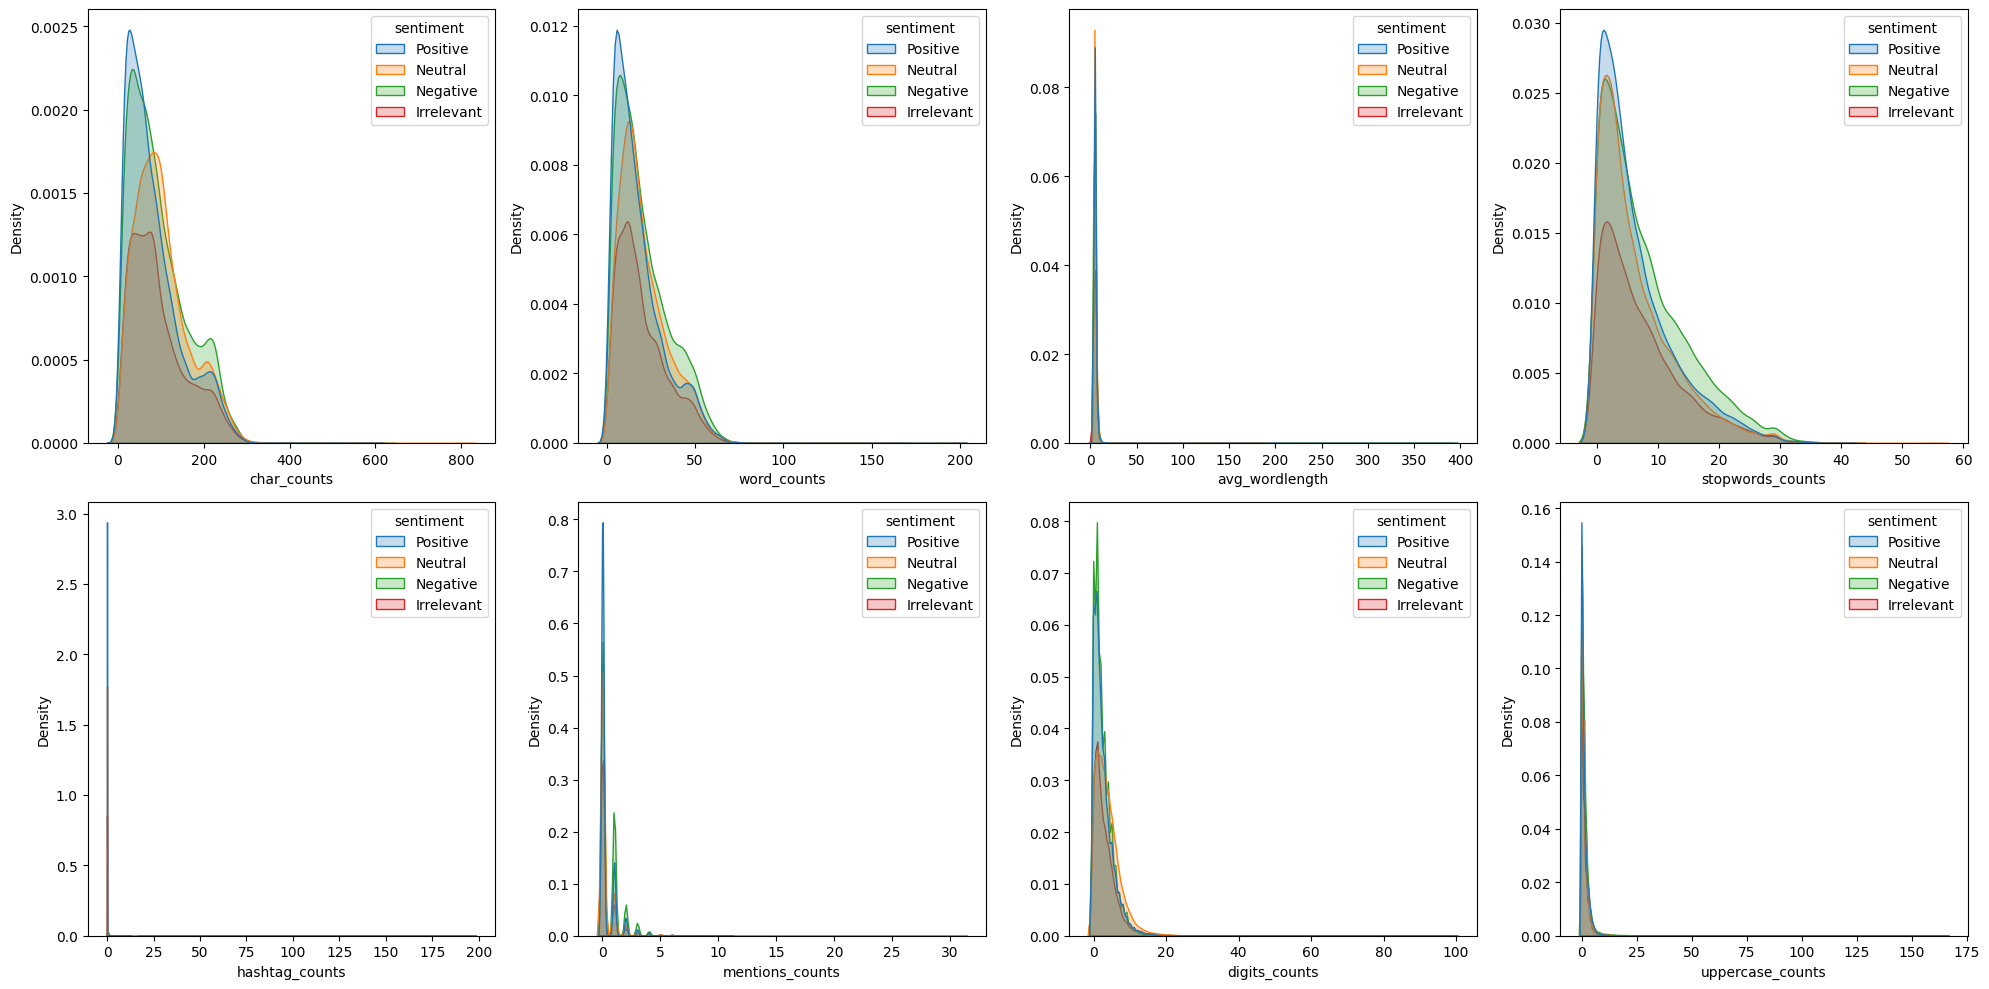

In [ ]:
df.head()
#hashtags, @mention,123, UPPER
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
num_cols=df.select_dtypes(include='number').columns

for index, column in enumerate(num_cols):
  plt.subplot(2,4, index+1)
  sns.kdeplot(data=df, x=column, hue='sentiment', fill=True)

plt.tight_layout()
plt.show()

<Axes: ylabel='sentiment'>

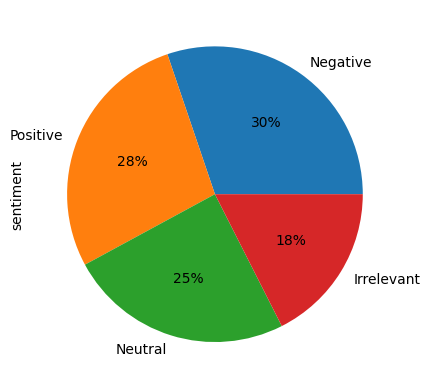

In [ ]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [ ]:
## worldcloud visualizations
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)
stopwords

In [ ]:
from matplotlib import pyplot as plt

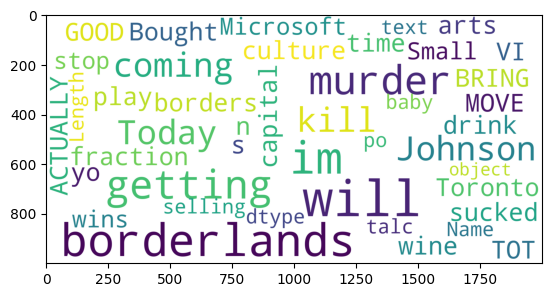

In [ ]:
from matplotlib import pyplot as plt

wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40, scale=5).generate(str(df['text']))
plt.imshow(wordcloud)

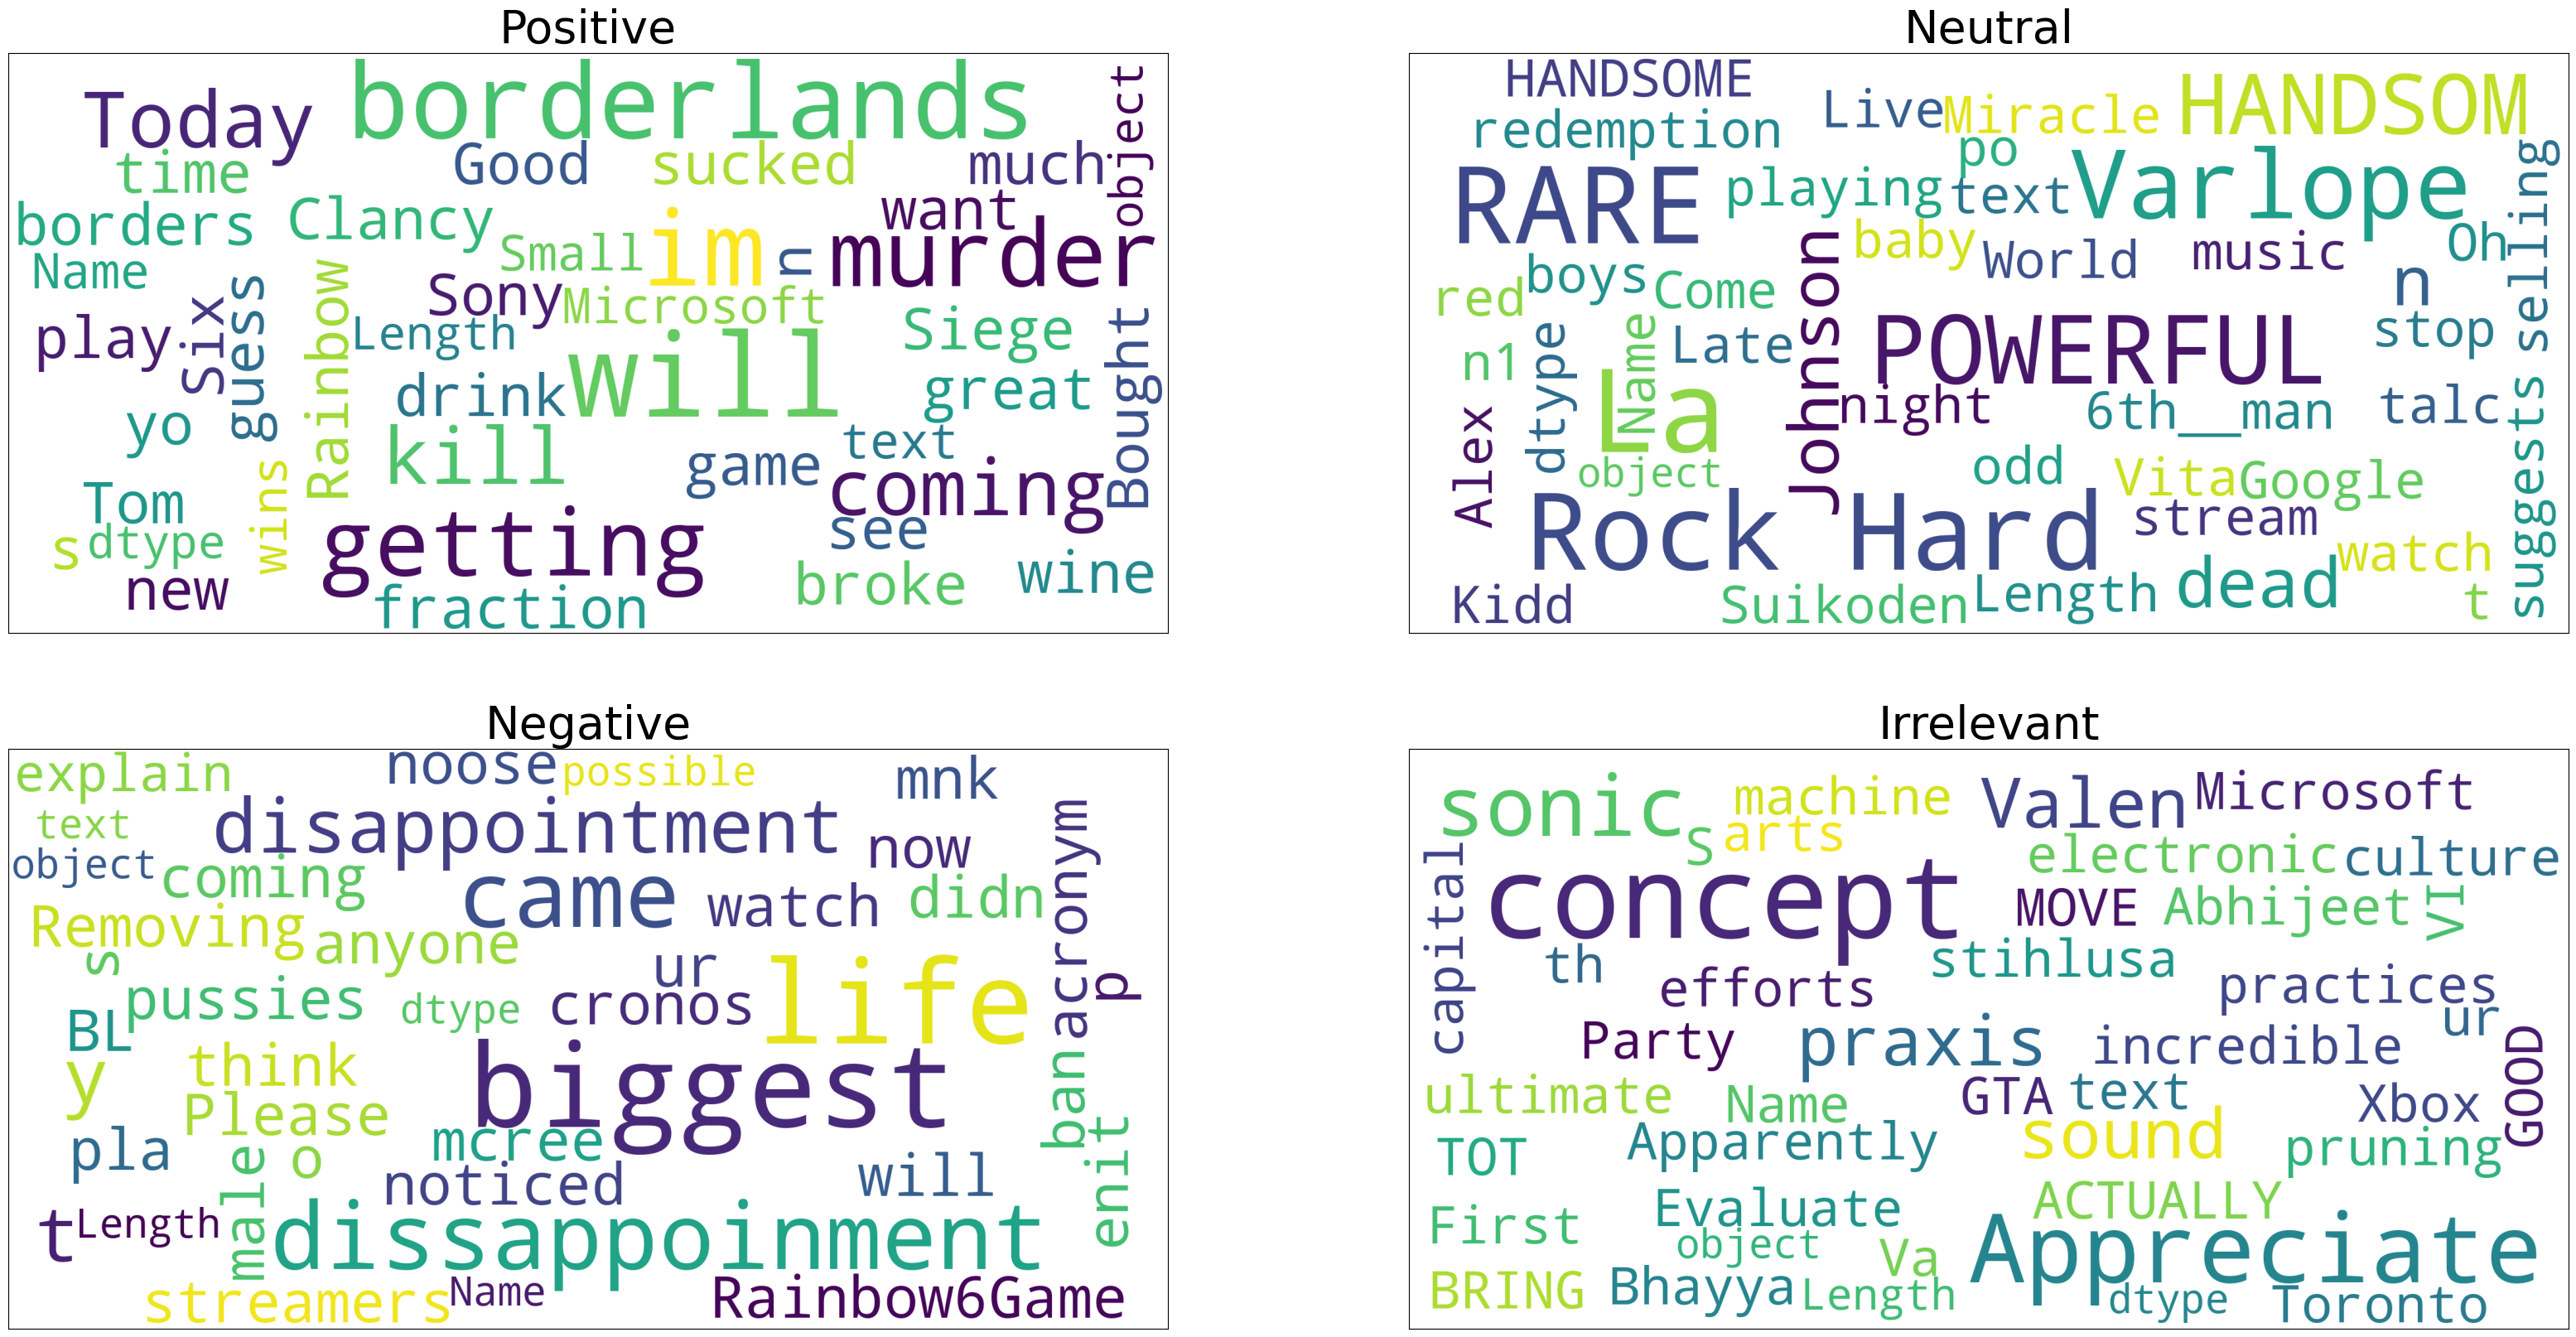

In [ ]:
plt.figure(figsize=(40,20))
for index, sent in enumerate(df['sentiment'].unique()):
  plt.subplot(2,2, index+1)

  data=df[df['sentiment']==sent]['text']
  wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40, scale=5).generate(str(data))
  plt.imshow(wordcloud)
  plt.xticks([])
  plt.yticks([])
  plt.title(sent,fontsize=40)

**Data Cleaning**

In [ ]:
df['text']=df['text'].apply(lambda x: x.lower())
df['text']=df['text'].apply(lambda x: ps.remove_urls(x))
df['text']=df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text']=df['text'].apply(lambda x: ps.remove_rt(x))
df['text']=df['text'].apply(lambda x: ps.remove_special_chars(x))

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['text'],df['sentiment'],test_size=0.2,random_state=0)

In [ ]:
X_train.shape,X_test.shape

((58306,), (14577,))

**Model Building and Testing**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
clf=Pipeline([('tfid',TfidfVectorizer()),('rfc',RandomForestClassifier(n_jobs=-1))])
clf.fit(X_train,y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

**Evaluation**

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.98      0.85      0.91      2561
    Negative       0.92      0.96      0.94      4481
     Neutral       0.92      0.92      0.92      3553
    Positive       0.91      0.94      0.92      3982

    accuracy                           0.92     14577
   macro avg       0.93      0.92      0.92     14577
weighted avg       0.93      0.92      0.92     14577



In [ ]:
import pickle
pickle.dump(clf,open('twitter_sentiment.pkl','wb'))

In [ ]:
clf.predict(['let me not upset you'])

array(['Negative'], dtype=object)

In [ ]:
clf.predict(['I am very glad'])

array(['Positive'], dtype=object)

In [ ]:
clf.predict(['I have done nothing but play borderland all day'])

array(['Positive'], dtype=object)

In [ ]:
clf.predict(['how the hell are we into halloween month already'])

array(['Irrelevant'], dtype=object)